## __II. Estimating $f$__

In essence, *Statistical Learning* refers to a set of approaches for estimating $f$.

__Prediction__. (Black Box method i.e. i don't care how it works, just give me a high accuracy) An educated/informed estimate of a possible outcome by applying a trained model to new input data. In *Prediction* You don't care how the model works as long as its accurate enough (reducing $[Y-\hat{Y}]^2$)

- __Reducible Error__. A part of a model's prediction error that can be decreased by improving the model. In simpler terms, this is the part where we can actually change something so that our model will predict better. Imagine shooting a bow, u missed in the first shot, but you improve your aim this is *Reducible error*.

- __Irreducible Error__. The unavoidable error that cannot be reduced, even with a perfect algorithm due to circumstances e.g. noise, unobserved variables. These are the unpredictable noise in the data. Same analogy with the bow, no matter how you improve your aim, we can't guarantee a 100% accuracy due to certain unobserved factors like breeze, health condition of the shooter, etc.

$$E(Y - \hat{Y})^2 = \underbrace{[f(X) - \hat{f}(X)]^2}_{\text{Reducible Error}} + \underbrace{Var(\epsilon)}_{\text{Irreducible Error}}$$
(provide a dumbed down explanation of the equation)

__Inference__. (White Box i.e. How does the model work from the inside) Developing models based on the relationships between predictors (X). Instead of the black box method of *Prediction* e.g. simply forcing the model to learn a linear relationship of a data even though in reality it is more complex like the data is curvy, we try to open the box and see what's actually affecting the predictions. The primary goal of *Inference* is to understand why $X$ results to $Y$.


## __II. How is $f$ estimated?__

__Parametric Method__. this method involves two key steps:

- First, we assume the form or shape of the function $f$ e.g. a linear form:
$$ f(X) = \beta_0 + \beta_1X_1 + ... + \beta_pX_p$$
- Next, we will need a procedure that uses a training data to fit or train the model. A common procedure of this is the *least squares method*, it minimizes the sum of the squared differences between the actual outcome and the predicted outcome. Essentially, finding the line of "best fit".

Why its called parametric? because it relies on the "parameters" or the knobs that you adjust to fit the model to the data. Example in linear equation:
$$y=mx+b$$
You adjust the slope ($m$) and $y$-intercept ($b$) to fit the simple line in the data. See a similarity? let's convert it to a machine learning model, a linear regression model:
$$f(X)=\beta_1 X_1+\beta_0$$
Though, the training will be easier due to the assumption of the form, it poses problems where the model is forced to fit on a on a data with a predetermined shape of $f$. Say, the data is curved, quadratic, logarithmic, etc., then, a linear model is not suitable, and will not yield adequate results. That's why we choose flexible methods that can fit most data.

__Non-Parametric Methods__. this method is the opposite of non-parametric method. It doesn't assume the form of the function $f$. By, finding the best possible form of $f$ it can find the best form that can fit $f$ to a wide range of data. The only downside is that, far more observations is needed compared to parametric methods to find the best possible $f$. Another problem is that, it may *overfit* to the data.

- An example approach of this is the __Thin Plate Spline__.

## __III. Trade Off Between Prediction Accuracy and Model Interpretability__

A trade-off can be found between prediction accuracy or model interpretability. If you want to have a model that can have high accuracy, but difficult to interpret how it arrived to that conclusion, then use models with higher flexibility e.g. Deep Learning, Support Vector Machines, Splines, but as a result, yielding diminished understanding of the model i.e. a black box. On the other hand, if one must know the inner workings of a model, then go for models similar linear regression or least squares method, though, it may be inflexible to the data due to its parametric nature.

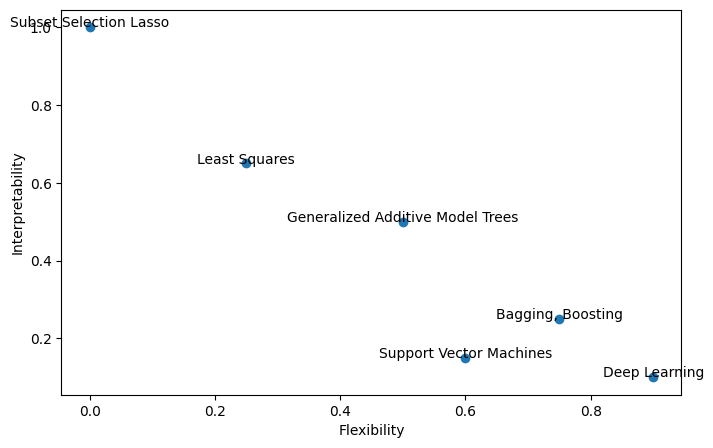

In [1]:
import matplotlib.pyplot as plt

labels = [
    'Subset Selection Lasso', 
    'Least Squares', 
    'Generalized Additive Model Trees', 
    'Bagging, Boosting', 
    'Support Vector Machines', 
    'Deep Learning'
]
x1 = [0.0, 0.25, 0.50, 0.75, 0.60, 0.90] # Flexibility
x2 = [1.0, 0.65, 0.50, 0.25, 0.15, 0.10] # Interpretability

plt.figure(figsize=(8, 5))
plt.scatter(x1, x2, label=labels)
plt.xlabel('Flexibility')
plt.ylabel('Interpretability')

for i, label in enumerate(labels):
    plt.annotate(label, (x1[i], x2[i]), textcoords="offset points", xytext=(0, 0), ha='center')

plt.show()

## __IV. Supervised vs. Unsupervised Learning__

__Supervised Learning__. Fits the model based on the "correct answers" aka labels.
    
    - Method/s: Linear Regression, Logistic Regression, GAM, boosting, and SVM

__Unsupervised Learning__. Lacks the "labels" needed to teach the model. It's like learning blind, you don't know the correct answer after each test, so you simply check the structure of the data, and check what fits well e.g. Grouping clusters of data.
    
    - Method/s: K-means Clustering, Clustering Analysis
    

## __V. Regression vs. Classification Problems__

__Regression Problems__. Where the response or output are quantitative.

__Classification Problems__. Where the response or output are qualitative/categorical.


## __VI. Assessing Model Accuracy__

__Measuring the Quality of Fit__. 

- In regression, Mean Squared Error is commonly used: $$MSE=\frac{1}{N}\sum_{i=1}^n(y_i-\hat{f}(x_i))^2$$
- The best model is the one with the smallest test MSE: $$Ave(y_0-\hat{f}(x_0))^2$$
- We almost expect that training MSE is lower than test MSE because most statistical learning methods seek to minimize the training MSE.
- There is one example method to get the minimal test MSE: __Cross-Validation__

__The Bias-Variance Trade-Off__.

- The expected test MSE for a given value $x_0$ can always be decomposed: $$E(y_0-\hat{f}(x_0))^2=Var(\hat{f}(x_0)) + [Bias\hat{f}(x_0)]^2+Var(\epsilon)$$
- The equation tells us that to achieve the minimum expected test MSE, we must find a statistical learning method that simultaneously achieves low _variance_ and low _bias_, hence the _reducible errors_.
- __Variance__. refers to how much a model’s predictions would change if it were trained on a different (but similar) training dataset. High variance models fit the training data very closely but perform poorly on unseen data. Example, you got high scores when you repeteadly answer the same practice test paper, but when it comes to the actual test paper with new questions, you flunk it so bad.
- __Bias__. Bias is the error due to overly simple assumptions in a model, causing it to underfit the data and perform poorly on both training and test datasets.
- Good test set performance requires low variance and low bias.

__On Classification__.

- The most common method in quantifying the accuracy of estimate $\hat{f}$ is the training error rate: $$\frac{1}{n}\sum_{i=1}^nI(y_i \neq \hat{y}_i)$$
- A good classifier is one for which the test error is smallest: $$Ave(I(y_0\neq\hat{y}_0)$$
- It is possible to predict the most likely class based on the predictor __(Bayes Classifier)__: $$P(Y=j|X=x_0)$$
- In a two-class problem predicting class one is $P(Y=j|X=x_0) > 0.5$, and class two otherwise.
- __Bayes Decision Boundary__. the dividing line that separates regions of classes in a feature space.
- The Bayes Error rate is given by: $$1-E(\max_jP(Y=j|X))$$
- The bayes error rate is analogous to the irreducible error since it is lowest possible expected error achievable by any classifier, assuming we know the true joint distribution $P(X,Y)$
- Because we can never know the true probability distribution that generates the data, we cannot actually build the Bayes optimal classifier. However, it represents the best possible performance any classifier could ever achieve, so we use it as a theoretical benchmark to evaluate and compare learning algorithms.
- Another method in classifying the highest estimated probability is the __K-nearest neighbors (KNN)__ classifier. KNN classifier first identifies the $K$ points in the training data that are closest to $x_0$, represented by $N_0$. It then estimates the conditional probability for class $j$ as the fraction of points in $N_0$ whose response values equal $j$: $$P(Y=j|X=x_0)=\frac{1}{K}\sum_{i \in N_0}I(y_i=j)$$
- KNN classifies the test observation $x_0$ to the class with the largest probability.
- Despite the simple approach, KNN can often produce classifiers that are surprisingly close to the Bayes optimal classifier.
- Similar to regression, choosing the right flexibility (in KNN choosing the right number of K) is key to success in achieving low variance and low bias.

## __VII. Some Python Data Science Fundamentals__

#### __Numerical Python (NumPy)__

In [2]:
import numpy as np

# numpy arrays
x = np.array([3, 4, 5])
y = np.array([4, 9, 7])

In [3]:
# array addition
x + y

array([ 7, 13, 12])

In [4]:
# 2 dimensional array
x = np.array([[1, 2], [3, 4]])
x

array([[1, 2],
       [3, 4]])

In [5]:
# numpy get the number of dimensions
x.ndim

2

In [6]:
# get the datatype
x.dtype

dtype('int64')

In [7]:
# get the documentation
np.array?

Signature:
np.array(
    object,
    dtype=None,
    *,
    copy=True,
    order='K',
    subok=False,
    ndmin=0,
    ndmax=0,
    like=None,
)
Docstring:
array(object, dtype=None, *, copy=True, order='K', subok=False, ndmin=0,
      ndmax=0, like=None)

Create an array.

Parameters
----------
object : array_like
    An array, any object exposing the array interface, an object whose
    ``__array__`` method returns an array, or any (nested) sequence.
    If object is a scalar, a 0-dimensional array containing object is
    returned.
dtype : data-type, optional
    The desired data-type for the array. If not given, NumPy will try to use
    a default ``dtype`` that can represent the values (by applying promotion
    rules when necessary.)
copy : bool, optional
    If ``True`` (default), then the array data is copied. If ``None``,
    a copy will only be made if ``__array__`` returns a copy, if obj is
    a nested sequence, or if a copy is needed to satisfy any of the other
    require

In [8]:
# create a floating point array
np.array([[1, 2], [3, 4]], dtype=float).dtype

dtype('float64')

In [9]:
# get the number of rows and columns of an array
x.shape

(2, 2)

In [10]:
# get the sum of an array
np.sum(x)

np.int64(10)

In [11]:
# reshape an array
x = np.array([1, 2, 3, 4, 5, 6])
print(x)
x_reshape = x.reshape((2, 3))
print(x_reshape)

[1 2 3 4 5 6]
[[1 2 3]
 [4 5 6]]


In [12]:
# Accessing elements in the reshaped array
x_reshape[0, 0]

np.int64(1)

In [13]:
x_reshape[1, 2]

np.int64(6)

In [14]:
# x and x_reshape occupy the same space in the memory, they are pointers per say
# look at this when we modify x_reshape[0, 0]
x_reshape[0, 0] = 5

In [15]:
x_reshape

array([[5, 2, 3],
       [4, 5, 6]])

In [16]:
x

array([5, 2, 3, 4, 5, 6])

In [17]:
# Transposing a matrix
x_reshape.T

array([[5, 4],
       [2, 5],
       [3, 6]])

In [18]:
# Square root the elements
np.sqrt(x)

array([2.23606798, 1.41421356, 1.73205081, 2.        , 2.23606798,
       2.44948974])

In [19]:
# Square the elements
x**2

array([25,  4,  9, 16, 25, 36])

In [20]:
# Square root by power
x**0.5

array([2.23606798, 1.41421356, 1.73205081, 2.        , 2.23606798,
       2.44948974])

In [21]:
# Generate random variables
x = np.random.normal(size=50)
x

array([-0.35363793, -1.44126267,  0.67131728,  0.11861755, -1.10414965,
       -0.80480024,  1.93950747, -1.29564257,  0.91010862,  0.72099337,
        0.92898098, -0.03394654, -0.17568529,  1.02747506,  0.3864855 ,
       -0.48397042, -0.1894154 ,  0.50593489,  1.10712874, -0.36946041,
        1.3920074 ,  0.20473966, -0.27257888,  0.74537634,  1.242215  ,
       -1.76925286,  1.04932331, -0.47556971,  1.48336022, -0.52663379,
        0.5397811 , -1.05474817, -1.0568986 , -0.79965471,  1.86897139,
       -0.45985227,  0.16097967, -0.13705317,  0.80373536,  1.03358379,
       -0.03298329, -1.53863315, -0.50287953, -1.50808855,  0.0122715 ,
       -1.15273148, -2.00380992, -3.21952999, -0.83277024, -0.32383904])

In [22]:
y = x + np.random.normal(loc=50, scale=1, size=50)

In [23]:
np.corrcoef(x, y)

array([[1.        , 0.83960048],
       [0.83960048, 1.        ]])

In [24]:
# Setting the seed
rng = np.random.default_rng(1303)
print(rng.normal(scale=5, size=2))
rng2 = np.random.default_rng(1303)
print(rng2.normal(scale=5, size=2))

[ 4.09482632 -1.07485605]
[ 4.09482632 -1.07485605]


In [25]:
# Computing the mean, variance, and standard deviation
rng = np.random.default_rng(3)
y = rng.standard_normal(10)
np.mean(y), y.mean()

(np.float64(-0.1126795190952861), np.float64(-0.1126795190952861))

In [26]:
np.var(y), y.var(), np.mean((y - y.mean())**2)

(np.float64(2.7243406406465125),
 np.float64(2.7243406406465125),
 np.float64(2.7243406406465125))

In [27]:
np.var?

Signature:      
np.var(
    a,
    axis=None,
    dtype=None,
    out=None,
    ddof=0,
    keepdims=<no value>,
    *,
    where=<no value>,
    mean=<no value>,
    correction=<no value>,
)
Call signature:  np.var(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function var at 0x107ea2e80>
File:            ~/Documents/GitHub/Statistical_Learning/.venv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py
Docstring:      
Compute the variance along the specified axis.

Returns the variance of the array elements, a measure of the spread of a
distribution.  The variance is computed for the flattened array by
default, otherwise over the specified axis.

Parameters
----------
a : array_like
    Array containing numbers whose variance is desired.  If `a` is not an
    array, a conversion is attempted.
axis : None or int or tuple of ints, optional
    Axis or axes along which the variance is computed.  The default is to
    compute the variance of the flatten

In [28]:
np.sqrt(np.var(y)), np.std(y)

(np.float64(1.6505576756498128), np.float64(1.6505576756498128))

In [29]:
# mean, variance, and standard deviation can be applied to the rows and columns of a matrix
X = rng.standard_normal((10, 3))
X

array([[ 0.22578661, -0.35263079, -0.28128742],
       [-0.66804635, -1.05515055, -0.39080098],
       [ 0.48194539, -0.23855361,  0.9577587 ],
       [-0.19980213,  0.02425957,  1.54582085],
       [ 0.54510552, -0.50522874, -0.18283897],
       [ 0.54052513,  1.93508803, -0.26962033],
       [-0.24355868,  1.0023136 , -0.88645994],
       [-0.29172023,  0.88253897,  0.58035002],
       [ 0.0915167 ,  0.67010435, -2.82816231],
       [ 1.02130682, -0.95964476, -1.66861984]])

In [30]:
# Since arrays are row-ordered, the first axis i.e. axis=0, refers to the rows.
X.mean(axis=0)

array([ 0.15030588,  0.14030961, -0.34238602])

In [31]:
# same result
X.mean(0)

array([ 0.15030588,  0.14030961, -0.34238602])

#### __Graphics (Matplotlib)__

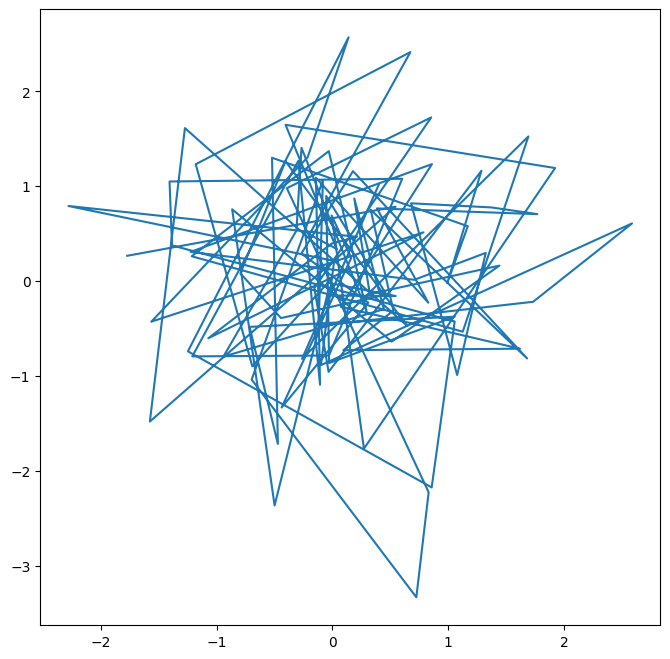

In [34]:
# subplots
from matplotlib.pyplot import subplots
fig, ax = subplots(figsize=(8,8))
x = rng.standard_normal(100)
y = rng.standard_normal(100)
ax.plot(x, y)

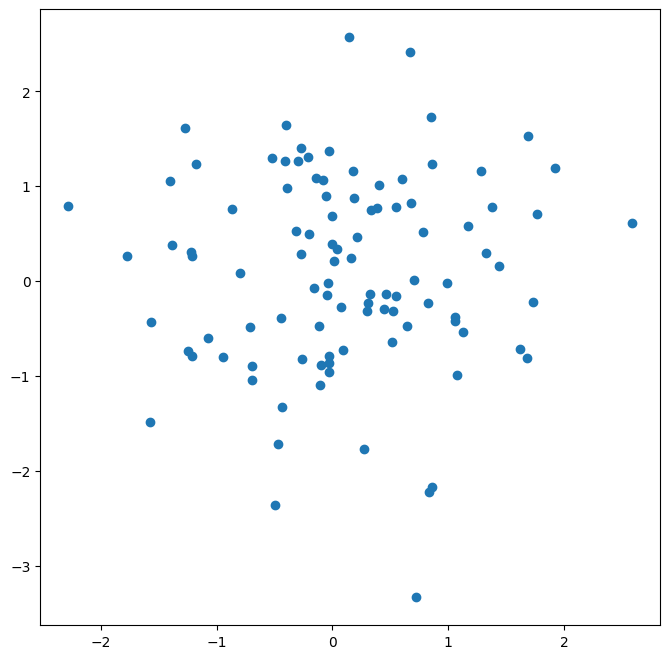

In [36]:
# display circles instead
fig, ax = subplots(figsize=(8, 8))
ax.plot(x, y, 'o')

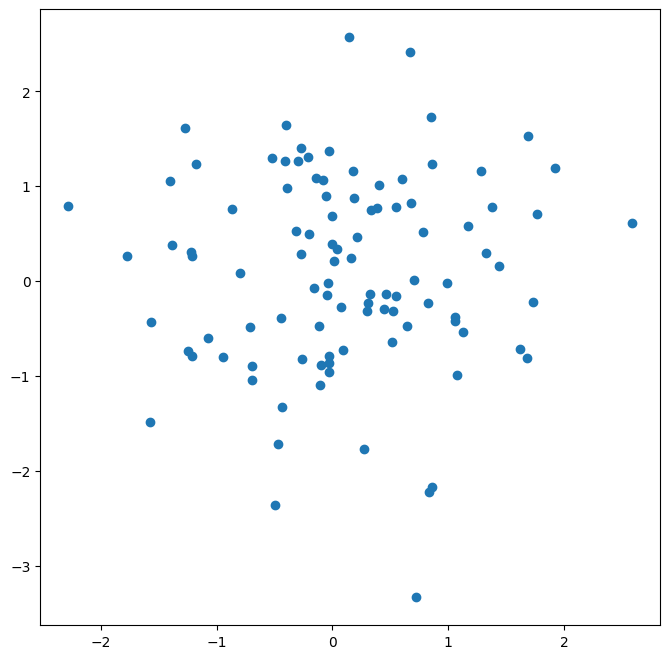

In [37]:
# display scatter plot
fig, ax = subplots(figsize=(8,8))
ax.scatter(x, y, marker='o')

Text(0.5, 1.0, 'Plot of X vs Y')

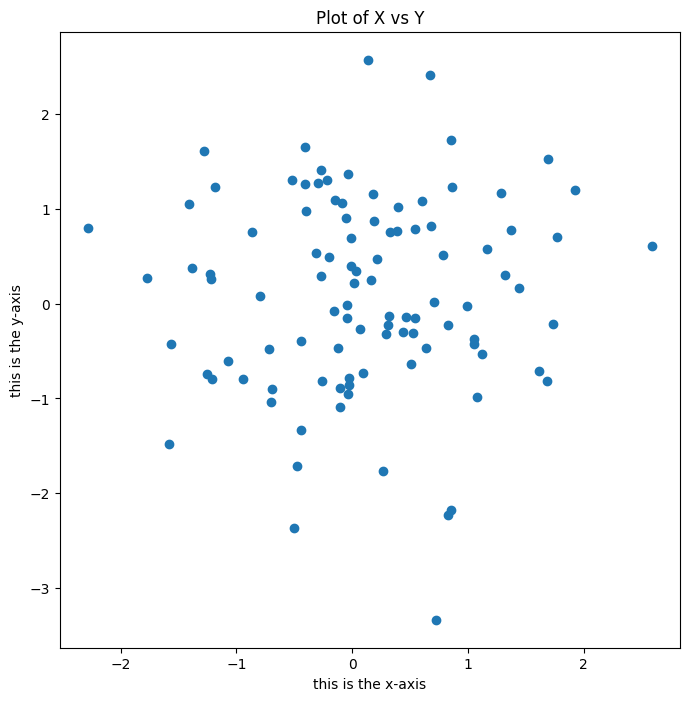

In [38]:
# plot labeling
fig, ax = subplots(figsize=(8,8))
ax.scatter(x, y, marker='o')
ax.set_xlabel("this is the x-axis")
ax.set_ylabel("this is the y-axis")
ax.set_title("Plot of X vs Y")

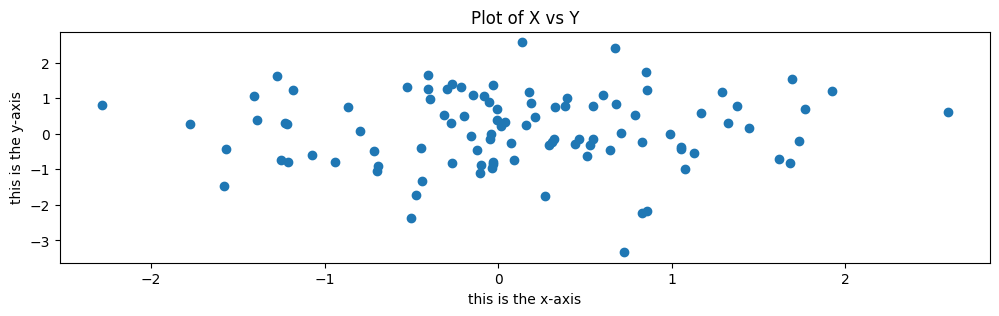

In [39]:
# Change the size of the plot
fig.set_size_inches(12, 3)
fig

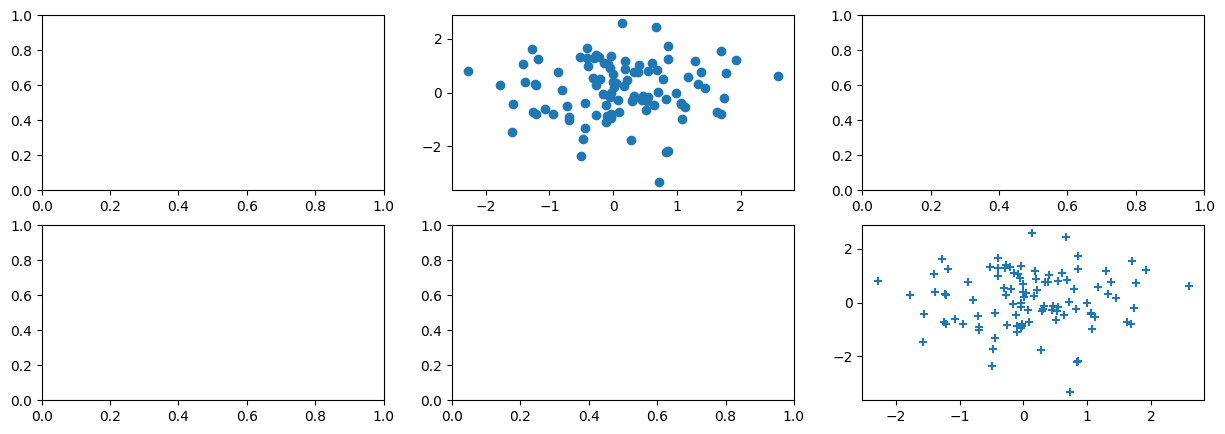

In [41]:
# More plots
fig, axes = subplots(nrows=2, ncols=3, figsize=(15,5))
axes[0,1].plot(x,y,'o')
axes[1,2].scatter(x,y,marker='+')

In [42]:
# Saving
fig.savefig('Figure.png', dpi=400)
fig.savefig('Figure.pdf', dpi=200)

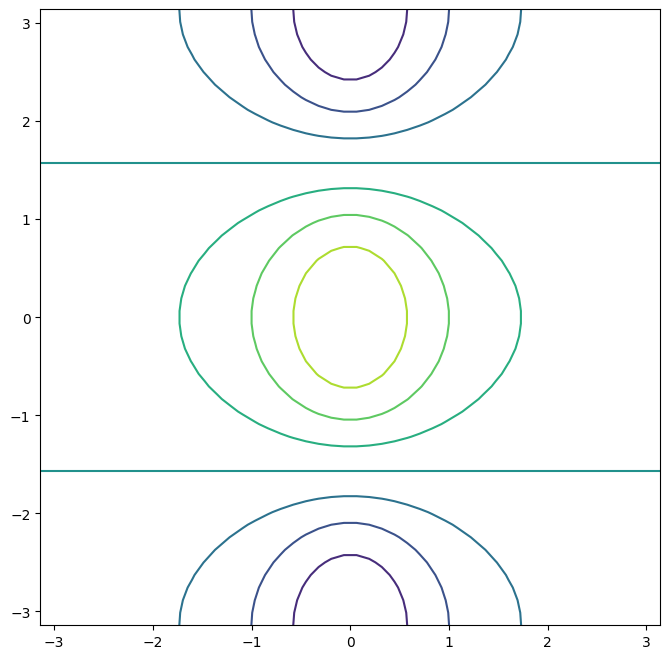

In [44]:
# Contour plot for representing three-dimensional data
# It has three args:
# - vector of x values (first dimension)
# - vector of y values (second dimension)
# - a matrix whose elements correspond to the z value (third dimension) for each pair of (x,y) coordinates

fig, ax = subplots(figsize=(8,8))
x = np.linspace(-np.pi, np.pi, 50) # alternative for producing numbers np.linspace(a, b, n), vector of n numbers from a - b
y = x
f = np.multiply.outer(np.cos(y), 1 / (1 + x**2))
ax.contour(x, y, f)

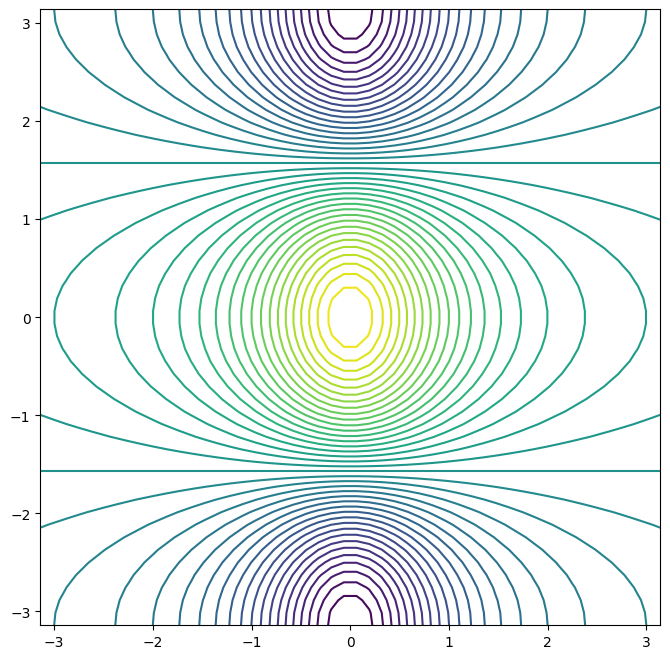

In [45]:
# Increasing resolution
fig, ax = subplots(figsize=(8,8))
ax.contour(x, y, f, levels=45)

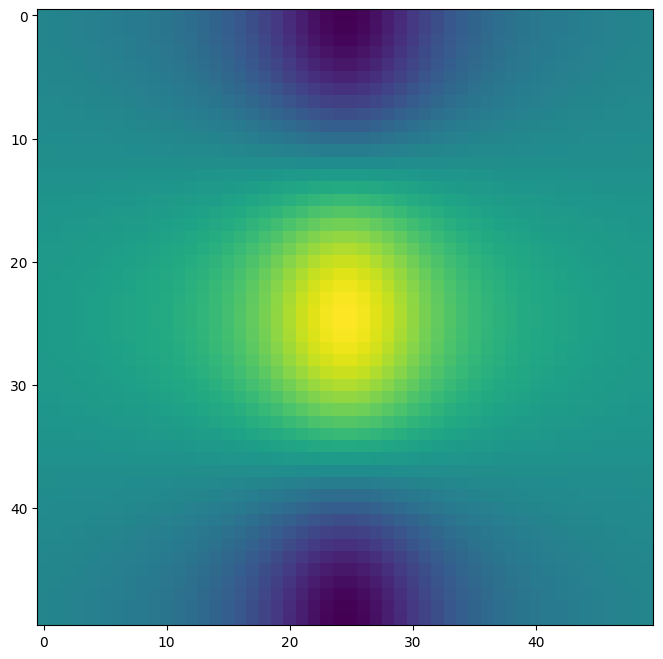

In [46]:
# Heatmap
fig, ax = subplots(figsize=(8,8))
ax.imshow(f)

#### __Sequences and Slice Notation__

In [47]:
seq1 = np.linspace(0, 10, 11)
seq1

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [48]:
seq2 = np.arange(0, 10)
seq2

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [49]:
# Slicing
"hello world"[3:6]

'lo '

In [51]:
# Longer version
"hello world"[slice(3,6)]

'lo '

#### __Indexing Data__

In [53]:
A = np.array(np.arange(16)).reshape((4,4))
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [54]:
# Retrieving
A[1,2]

np.int64(6)

In [55]:
# Selecting rows
A[[1, 3]]

array([[ 4,  5,  6,  7],
       [12, 13, 14, 15]])

In [56]:
# Selecting columns
A[:, [0,2]]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10],
       [12, 14]])

In [57]:
# Selecting a submatrix
A[[1, 3], [0,2]]

array([ 4, 14])

In [60]:
# Subsetting a subset matrix
# - subset the rows of A
# - then, subset the columns
A[[1,3]][:,[0,2]]

array([[ 4,  6],
       [12, 14]])

In [62]:
# Alternative to subsetting
idx = np.ix_([1,3], [0,2,3])
A[idx]

array([[ 4,  6,  7],
       [12, 14, 15]])

In [63]:
# Another alternative using Slicing
A[1:4:2,0:3:2]

array([[ 4,  6],
       [12, 14]])

In [64]:
# Boolean indexing
keep_rows = np.zeros(A.shape[0], bool)
keep_rows

array([False, False, False, False])

In [65]:
keep_rows[[1,3]] = True
keep_rows

array([False,  True, False,  True])

In [66]:
# Verifying if [0,1,0,1] == [False, True, False, True]
np.all(keep_rows == np.array([0,1,0,1]))

np.True_

In [67]:
# This indexes the first, second, first, and second rows of A
A[np.array([0,1,0,1])]

array([[0, 1, 2, 3],
       [4, 5, 6, 7],
       [0, 1, 2, 3],
       [4, 5, 6, 7]])

In [68]:
# This indexes the first and seconds rows of A only
A[keep_rows]

array([[ 4,  5,  6,  7],
       [12, 13, 14, 15]])

In [69]:
# Applying np.ix_ to Booleans
keep_cols = np.zeros(A.shape[1], bool)
keep_cols[[0, 2, 3]]= True
idx_bool = np.ix_(keep_rows, keep_cols)
A[idx_bool]

array([[ 4,  6,  7],
       [12, 14, 15]])

In [70]:
# Mix a list with an array of Booleans in the arguments
idx_mixed = np.ix_([1,3], keep_cols)
A[idx_mixed]

array([[ 4,  6,  7],
       [12, 14, 15]])

#### __Loading Data__

In [71]:
import pandas as pd
Auto = pd.read_csv('Auto.csv')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [72]:
# Look for a specific column
Auto['horsepower']

0      130
1      165
2      150
3      150
4      140
      ... 
392     86
393     52
394     84
395     79
396     82
Name: horsepower, Length: 397, dtype: object

In [73]:
# Get unique values
np.unique(Auto['horsepower'])

array(['100', '102', '103', '105', '107', '108', '110', '112', '113',
       '115', '116', '120', '122', '125', '129', '130', '132', '133',
       '135', '137', '138', '139', '140', '142', '145', '148', '149',
       '150', '152', '153', '155', '158', '160', '165', '167', '170',
       '175', '180', '190', '193', '198', '200', '208', '210', '215',
       '220', '225', '230', '46', '48', '49', '52', '53', '54', '58',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70',
       '71', '72', '74', '75', '76', '77', '78', '79', '80', '81', '82',
       '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93',
       '94', '95', '96', '97', '98', '?'], dtype=object)

In [74]:
# Replacing '?'
Auto = pd.read_csv('Auto.csv', na_values=['?'])
Auto['horsepower'].sum()

np.float64(40952.0)

In [76]:
# Getting the rows and columns of the dataset
Auto.shape

(397, 9)

In [77]:
# Getting rid of the missing data
Auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [78]:
Auto_new = Auto.dropna()
Auto_new.shape

(392, 9)

In [79]:
# Selecting rows and columns
Auto = Auto_new
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [80]:
# Selecting rows
Auto[:3]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite


In [81]:
# Subsetting rows using boolean
idx_80 = Auto['year'] > 80
Auto[idx_80]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
338,27.2,4,135.0,84.0,2490,15.7,81,1,plymouth reliant
339,26.6,4,151.0,84.0,2635,16.4,81,1,buick skylark
340,25.8,4,156.0,92.0,2620,14.4,81,1,dodge aries wagon (sw)
341,23.5,6,173.0,110.0,2725,12.6,81,1,chevrolet citation
342,30.0,4,135.0,84.0,2385,12.9,81,1,plymouth reliant
343,39.1,4,79.0,58.0,1755,16.9,81,3,toyota starlet
344,39.0,4,86.0,64.0,1875,16.4,81,1,plymouth champ
345,35.1,4,81.0,60.0,1760,16.1,81,3,honda civic 1300
346,32.3,4,97.0,67.0,2065,17.8,81,3,subaru
347,37.0,4,85.0,65.0,1975,19.4,81,3,datsun 210 mpg


In [82]:
# Selecting columns
Auto[['mpg','horsepower']]

,mpg,horsepower
0,18.0,130.0
1,15.0,165.0
2,18.0,150.0
3,16.0,150.0
4,17.0,140.0
...,...,...
392,27.0,86.0
393,44.0,52.0
394,32.0,84.0
395,28.0,79.0


In [83]:
# Setting an index
Auto.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       387, 388, 389, 390, 391, 392, 393, 394, 395, 396],
      dtype='int64', length=392)

In [84]:
# Setting an index using name
Auto_re = Auto.set_index('name')
Auto_re

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1
vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1


In [85]:
# Since we set the 'name' column as the index, we can't find the 'name' column in .columns
Auto_re.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [86]:
# Subsetting rows via the 'name' index
rows = ['amc rebel sst', 'ford torino']
Auto_re.loc[rows]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1


In [87]:
# Subsetting using iloc (Index Loc)
Auto_re.iloc[[3,4]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1


In [88]:
Auto_re.iloc[:, [0,2,3]]

,mpg,displacement,horsepower
name,,,
chevrolet chevelle malibu,18.0,307.0,130.0
buick skylark 320,15.0,350.0,165.0
plymouth satellite,18.0,318.0,150.0
amc rebel sst,16.0,304.0,150.0
ford torino,17.0,302.0,140.0
...,...,...,...
ford mustang gl,27.0,140.0,86.0
vw pickup,44.0,97.0,52.0
dodge rampage,32.0,135.0,84.0


In [89]:
Auto_re.iloc[[3,4], [0,2,3]]

,mpg,displacement,horsepower
name,,,
amc rebel sst,16.0,304.0,150.0
ford torino,17.0,302.0,140.0


In [90]:
Auto_re.loc['ford galaxie 500', ['mpg', 'origin']]

,mpg,origin
name,,
ford galaxie 500,15.0,1
ford galaxie 500,14.0,1
ford galaxie 500,14.0,1


In [91]:
# Specific subsetting
idx_80 = Auto_re['year'] > 80
Auto_re.loc[idx_80, ['weight', 'origin']]

,weight,origin
name,,
plymouth reliant,2490,1
buick skylark,2635,1
dodge aries wagon (sw),2620,1
chevrolet citation,2725,1
plymouth reliant,2385,1
toyota starlet,1755,3
plymouth champ,1875,1
honda civic 1300,1760,3
subaru,2065,3


In [92]:
# Concise method using lambda
Auto_re.loc[lambda df: df['year'] > 80, ['weight', 'origin']]

,weight,origin
name,,
plymouth reliant,2490,1
buick skylark,2635,1
dodge aries wagon (sw),2620,1
chevrolet citation,2725,1
plymouth reliant,2385,1
toyota starlet,1755,3
plymouth champ,1875,1
honda civic 1300,1760,3
subaru,2065,3


In [93]:
# Concise method using lambda
Auto_re.loc[lambda df: (df['year'] > 80) & (df['mpg'] > 30), ['weight', 'origin']]

,weight,origin
name,,
toyota starlet,1755,3
plymouth champ,1875,1
honda civic 1300,1760,3
subaru,2065,3
datsun 210 mpg,1975,3
toyota tercel,2050,3
mazda glc 4,1985,3
plymouth horizon 4,2215,1
ford escort 4w,2045,1


In [95]:
Auto_re.loc[lambda df: (df['displacement'] < 300) & (df.index.str.contains('ford')) | (df.index.str.contains('datsun')), ['weight', 'origin']]

,weight,origin
name,,
ford maverick,2587,1
datsun pl510,2130,3
datsun pl510,2130,3
ford torino 500,3302,1
ford mustang,3139,1
datsun 1200,1613,3
ford pinto runabout,2226,1
ford pinto (sw),2395,1
datsun 510 (sw),2288,3


#### __For Loops__

In [96]:
# Nested
total = 0
for value in [2, 3, 19]:
    for weight in [3, 2, 1]:
        total += value * weight
print(f'Total is: {total}')

Total is: 144


In [98]:
# Using zip (value, weight) pairs
total = 0
for value, weight in zip([2, 3, 19], [0.2, 0.3, 0.5]):
    total += value * weight
print(f'Weighted average is: {total}')

Weighted average is: 10.8


#### __Additional Graphical and Numerical Summaries__

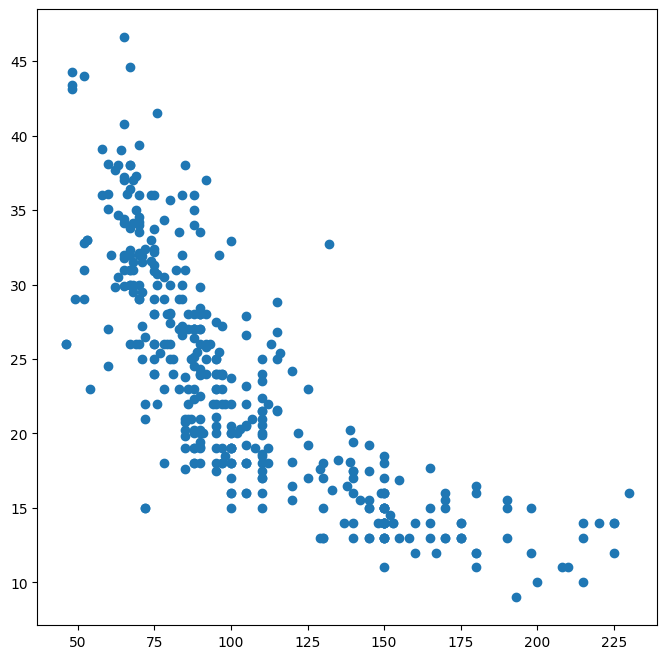

In [99]:
fig, ax = subplots(figsize=(8,8))
ax.plot(Auto['horsepower'], Auto['mpg'], 'o')

Text(0.5, 1.0, 'Horsepower vs. MPG')

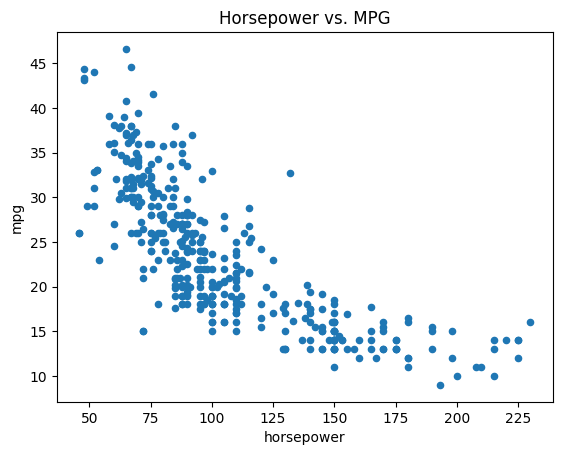

In [100]:
# Alternative
ax = Auto.plot.scatter('horsepower', 'mpg')
ax.set_title('Horsepower vs. MPG')

<Axes: xlabel='horsepower', ylabel='mpg'>

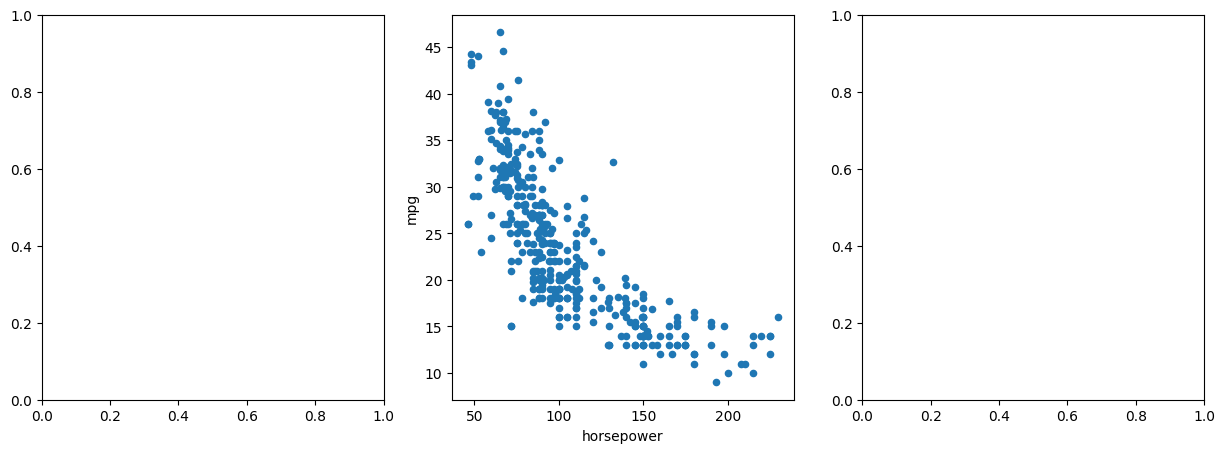

In [101]:
# Plot in a particular axes
fig, axes = subplots(ncols=3, figsize=(15,5))
Auto.plot.scatter('horsepower', 'mpg', ax=axes[1])

In [102]:
Auto.cylinders = pd.Series(Auto.cylinders, dtype='category')
Auto.cylinders.dtype

CategoricalDtype(categories=[3, 4, 5, 6, 8], ordered=False, categories_dtype=int64)

<Axes: title={'center': 'mpg'}, xlabel='cylinders'>

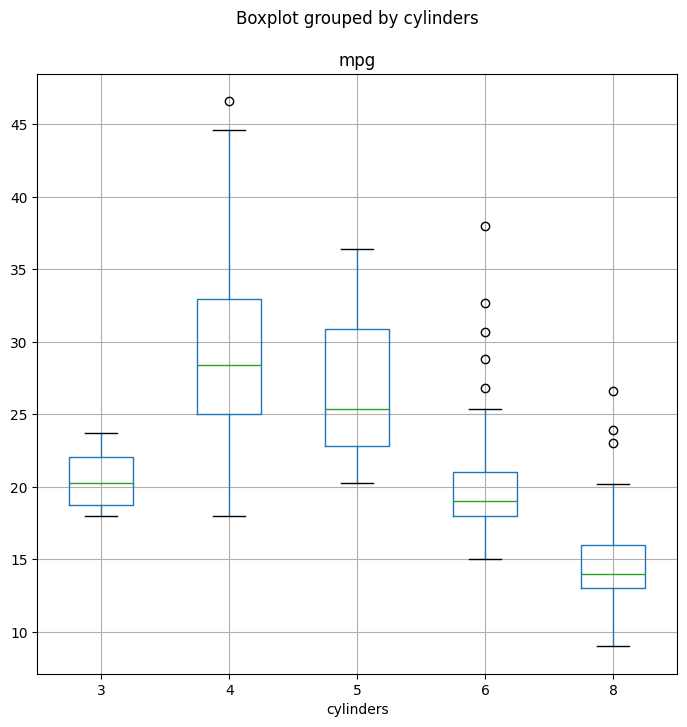

In [103]:
# Display using boxplot
fig, ax = subplots(figsize=(8,8))
Auto.boxplot('mpg', by='cylinders', ax=ax)

array([<Axes: title={'center': 'mpg'}>], dtype=object)

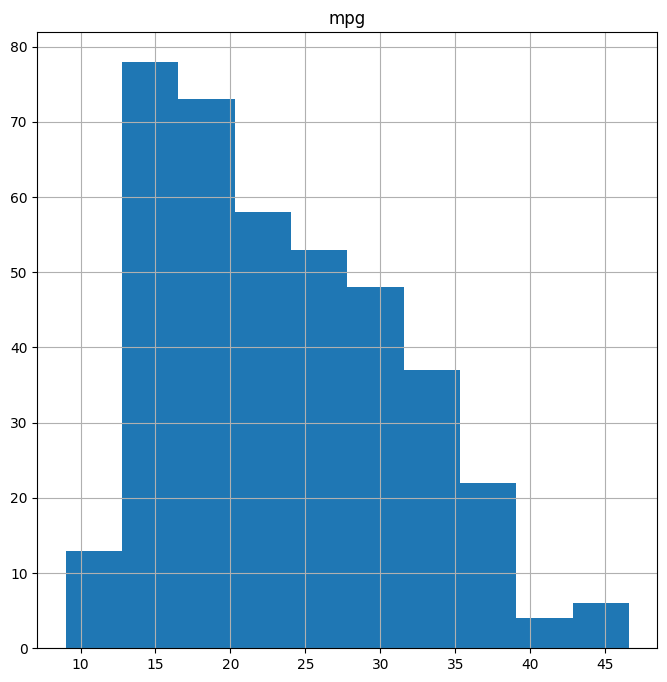

In [105]:
# Display a histogram
fig, ax = subplots(figsize=(8,8))
Auto.hist('mpg', ax=ax)

array([<Axes: title={'center': 'mpg'}>], dtype=object)

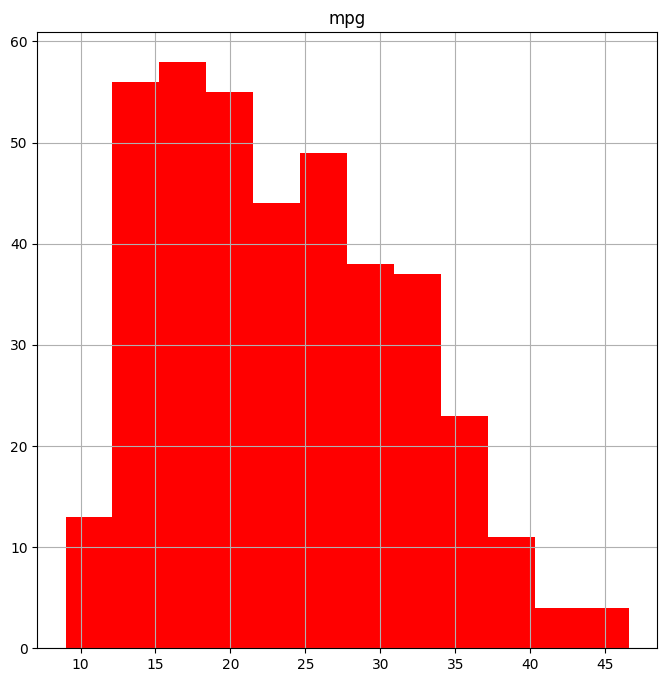

In [106]:
# Changing the number of bars and bins
fig, ax = subplots(figsize=(8,8))
Auto.hist('mpg', color='red', bins=12, ax=ax)

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='horsepower', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='year', ylabel='mpg'>,
        <Axes: xlabel='origin', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement'>,
        <Axes: xlabel='horsepower', ylabel='displacement'>,
        <Axes: xlabel='weight', ylabel='displacement'>,
        <Axes: xlabel='acceleration', ylabel='displacement'>,
        <Axes: xlabel='year', ylabel='displacement'>,
        <Axes: xlabel='origin', ylabel='displacement'>],
       [<Axes: xlabel='mpg', ylabel='horsepower'>,
        <Axes: xlabel='displacement', ylabel='horsepower'>,
        <Axes: xlabel='horsepower', ylabel='horsepower'>,
        <Axes: xlabel='weight', ylabel='horsepower'>,
        <Axes: xlabel='accelerat

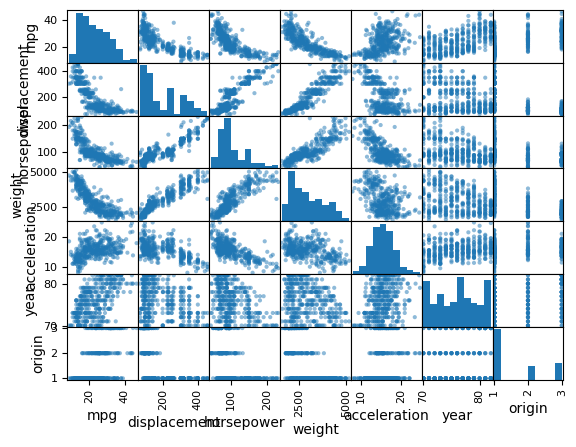

In [107]:
# Display a scatter matrix
pd.plotting.scatter_matrix(Auto, font)